In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
from scipy import io
import pykilosort as ks
from pykilosort import datashift
from pykilosort.datashift.align_block import align_block2

import matplotlib.pyplot as plt

In [3]:
# [imin,yblk, F0] = align_block2(F, ysamp, ops.nblocks);

matlab_input = io.loadmat("/home/alexmorley/git_repos/alignblock2_input.mat",
                          struct_as_record=False)

F = matlab_input["F"]
ysamp = matlab_input["ysamp"][0]
nblocks = matlab_input["nblocks"][0][0]

In [4]:
matlab_output = io.loadmat("/home/alexmorley/git_repos/alignblock2_output.mat")

expected_F0 = matlab_output["F0_"]
expected_yblk = matlab_output["yblk"]
expected_imin = matlab_output["imin"]

In [5]:
imin, yblk, F0 = align_block2(F, ysamp, nblocks)

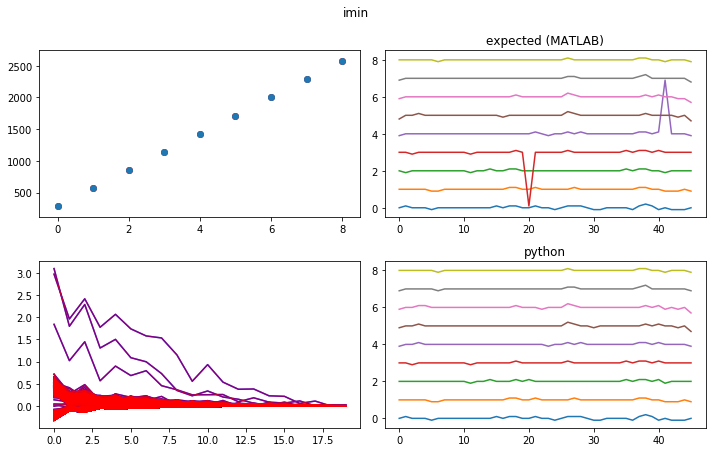

In [6]:
f,axs = plt.subplots(2,2,figsize=(10,6))
ax = axs[0,0]
ax.scatter(range(len(expected_yblk)), expected_yblk, label="expected (MATLAB)", color="r")
ax.scatter(range(len(yblk)), yblk, label="python")

f.suptitle("yblk", y=1.04)
f.tight_layout()

ax = axs[1,0]
ax.plot(F0[:,:,0].T, color="b");
ax.plot(F0[:,:,0].T, color="r", alpha=0.5);

ax = axs[0,1]
ax.plot(expected_imin+np.arange(expected_imin.shape[1]))

ax.set_title("expected (MATLAB)")

ax = axs[1,1]
ax.plot(imin+np.arange(imin.shape[1]))
ax.set_title("python")

f.suptitle("imin", y=1.04)
f.tight_layout()